<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/LinearRegressionProjectKrishNaik/SimpleLinearRegressionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# upload the file
from google.colab import files
uploaded = files.upload()

Saving height-weight (1).csv to height-weight (1) (1).csv


In [ ]:
df = pd.read_csv('/content/height-weight (1).csv')

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

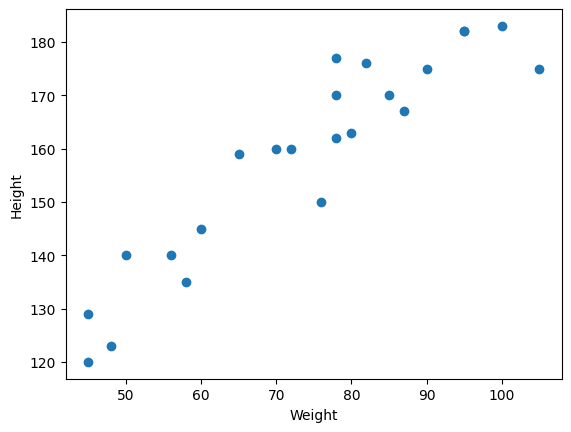

In [ ]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
# our main aim to create a basic fit line
# divide the dataset into independent and dependent features

x = df['Weight'] #Independent Feature
y = df['Height'] #Dependent Feature



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# standardize the dataset, train independent data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train.to_frame())
x_test_scaled = scaler.transform(x_test.to_frame())

In [ ]:
x_train_scaled

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

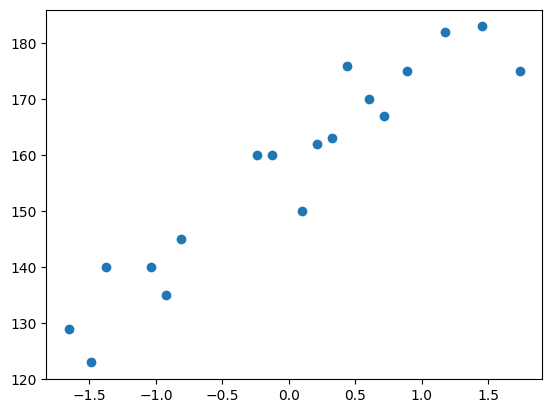

In [ ]:
plt.scatter(x_train_scaled, y_train)

In [ ]:
# train the linear regression model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(x_test_scaled)


R2 Score:  0.776986986042344


In [ ]:
m = regression.coef_
b = regression.intercept_

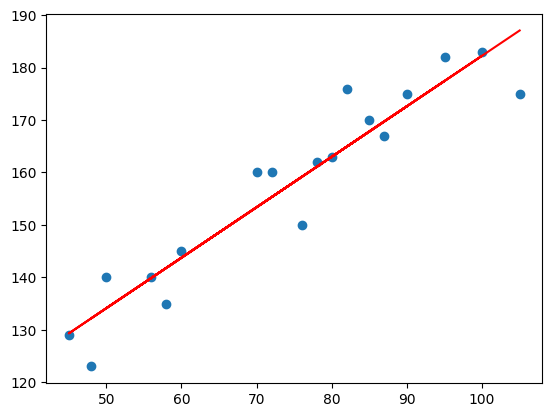

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train_scaled), color='red')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("R2 Score : ", score)

Mean Absolute Error :  9.822657814519232
Mean Squared Error :  109.77592599051664
R2 Score :  0.776986986042344


In [ ]:
# display adjusted r-squared
adjusted_r2Score = 1 - (1 - score)*(len(y_test) - 1) / (len(x_test) - 1 - score)

print("Adjusted R2 Score : ", adjusted_r2Score)

Adjusted R2 Score :  0.7232241843369906


In [ ]:
# new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

array([[0.32350772]])

In [ ]:
predicted_height = regression.predict(scaled_weight)
predicted_height

array([163.01076266])

In [ ]:
residuals = y_test - y_pred
print(residuals)

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64


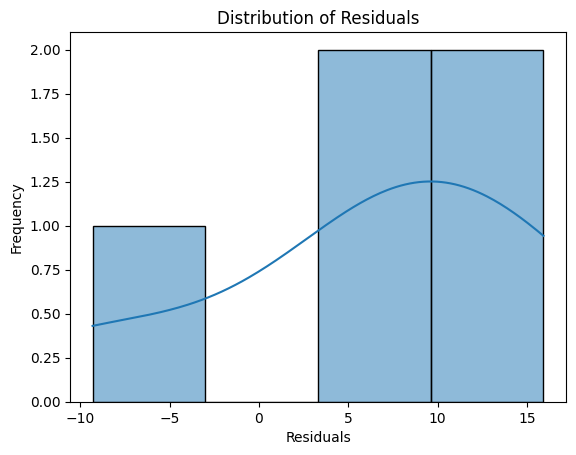

In [ ]:
# plot the residuals
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()